In [101]:
import pandas as pd 
df = pd.read_csv("preprocessed_bioactivity4.csv")
pd.set_option("display.max_row", None)

In [102]:
## **Calculate Lipinski descriptors**
'''Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10''' 

"Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.\n\nThe Lipinski's Rule stated the following:\n* Molecular weight < 500 Dalton\n* Octanol-water partition coefficient (LogP) < 5\n* Hydrogen bond donors < 5\n* Hydrogen bond acceptors < 10"

In [103]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [104]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [105]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [106]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
5,372.243,4.39330,0.0,3.0
6,311.337,3.76990,0.0,3.0
7,419.243,4.23540,0.0,3.0
8,327.792,4.28420,0.0,3.0
9,445.281,4.74860,0.0,3.0


In [107]:
df_combined = pd.concat([df,df_lipinski],axis = 1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.00,intermidiate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.00,intermidiate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.00,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.00,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.00,intermidiate,338.344,3.53900,0.0,5.0
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,980.00,active,372.243,4.39330,0.0,3.0
6,CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,4820.00,intermidiate,311.337,3.76990,0.0,3.0
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,950.00,active,419.243,4.23540,0.0,3.0
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,11200.00,inactive,327.792,4.28420,0.0,3.0
9,CHEMBL188983,O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21,23500.00,inactive,445.281,4.74860,0.0,3.0


In [108]:
import random as rand
x = df.standard_value
x = pd.Series(x)

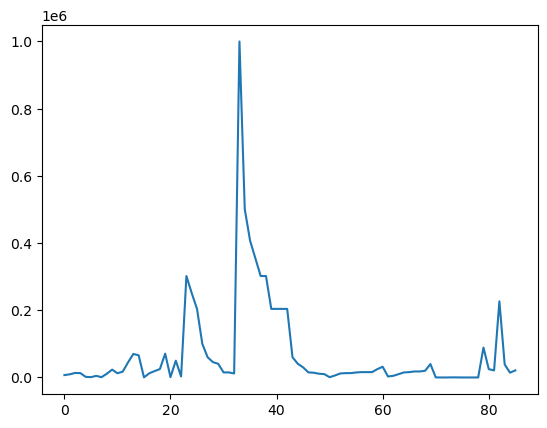

In [109]:
import matplotlib.pyplot as plt
plt.plot(x)

In [110]:
df_combined.standard_value.describe()

count         86.000000
mean       71384.050000
std       144115.579835
min           50.000000
25%         9550.000000
50%        16000.000000
75%        48927.205000
max      1000000.000000
Name: standard_value, dtype: float64

In [111]:
### **Convert IC50 to pIC50**
''' To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column'''
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [112]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [113]:
df_norm = norm_value(df_combined)
df_norm


C:\Users\makerofdreams\AppData\Local\Temp\ipykernel_17488\3416609517.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermidiate,281.271,1.89262,0.0,5.0,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermidiate,415.589,3.81320,0.0,2.0,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermidiate,338.344,3.53900,0.0,5.0,2000.00
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,980.00
6,CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,intermidiate,311.337,3.76990,0.0,3.0,4820.00
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,950.00
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,11200.00
9,CHEMBL188983,O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21,inactive,445.281,4.74860,0.0,3.0,23500.00


In [114]:
df_final = pIC50(df_norm)
df_final

C:\Users\makerofdreams\AppData\Local\Temp\ipykernel_17488\1016060508.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermidiate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermidiate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermidiate,338.344,3.53900,0.0,5.0,5.698970
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.39330,0.0,3.0,6.008774
6,CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,intermidiate,311.337,3.76990,0.0,3.0,5.316953
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.28420,0.0,3.0,4.950782
9,CHEMBL188983,O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21,inactive,445.281,4.74860,0.0,3.0,4.628932


In [115]:
df_norm.standard_value_norm.describe()

count         86.000000
mean       71384.050000
std       144115.579835
min           50.000000
25%         9550.000000
50%        16000.000000
75%        48927.205000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [116]:
df_final.pIC50.describe()

count    86.000000
mean      4.848276
std       0.972872
min       3.000000
25%       4.310772
50%       4.795880
75%       5.020154
max       7.301030
Name: pIC50, dtype: float64

In [117]:
import random as rand
x = df_final.pIC50
# x = pd.Series(x)
# y = np.arange(1,134)

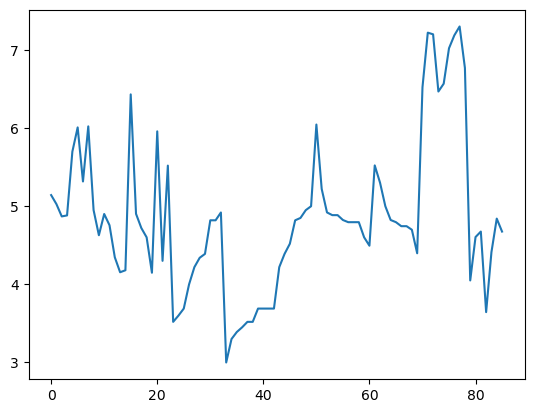

In [118]:
import matplotlib.pyplot as plt
plt.plot(x)

In [128]:
df2_class = df_final[df_final["class"] != "intermidiate"]

In [129]:
df2_class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50_120.csv')

In [130]:
df2_class.shape

(77, 8)

In [131]:
'''chemical space analysis'''


'chemical space analysis'

In [132]:
import seaborn as sns
sns.set(style = "ticks")

Text(0, 0.5, 'frequency')

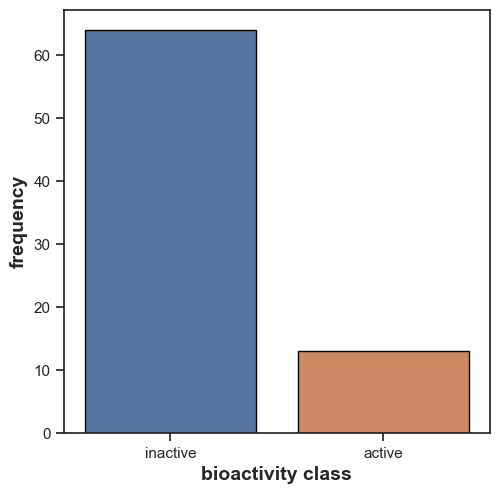

In [133]:
plt.figure(figsize = (5.5,5.5))
sns.countplot(x="class", data =df2_class, edgecolor ="black")
plt.xlabel("bioactivity class", fontsize = 14 , fontweight ="bold")
plt.ylabel("frequency",fontsize =14 ,fontweight ="bold")


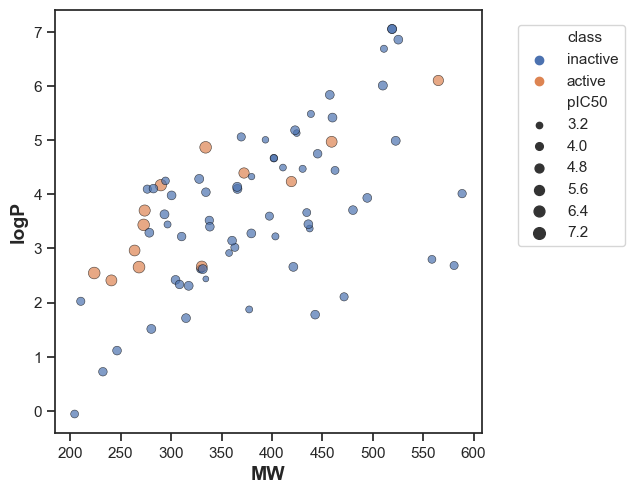

In [153]:
plt.figure(figsize = (5.5,5.5))
sns.scatterplot(x="MW",y ="LogP",data = df2_class , hue ="class" ,size ="pIC50", edgecolor ="black",alpha =0.7)
plt.xlabel("MW" , fontsize =14 ,fontweight ="bold")
plt.ylabel('logP',fontsize =14 ,fontweight ="bold")
plt.legend(bbox_to_anchor =(1.05,1), loc= 2,borderaxespad =1)

Text(0, 0.5, 'PIC50 value')

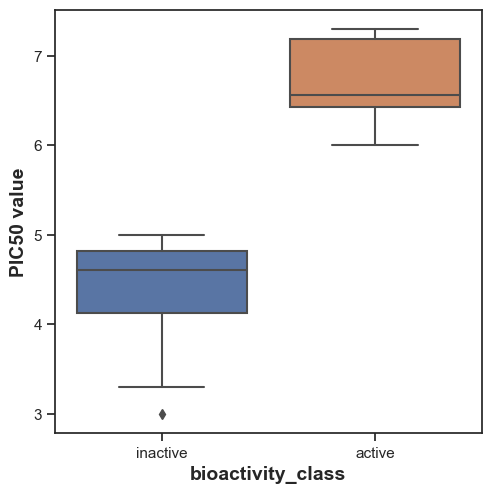

In [155]:
plt.figure(figsize= (5.5,5.5))
sns.boxplot(x ='class',y ="pIC50", data =df2_class)
plt.xlabel("bioactivity_class", fontsize =14 , fontweight ="bold")
plt.ylabel("PIC50 value", fontsize =14 , fontweight = "bold")


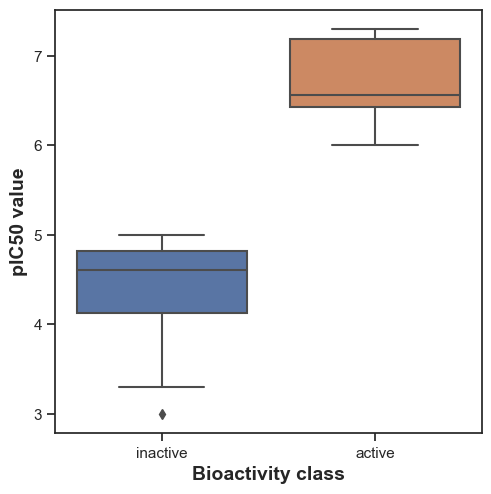

In [157]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [161]:
'''mannwhitney test is for testing if the active and inactive compounds are really different or not different 
we can test it by different discriptors like is the MW of acitive and diavtive compounds are different or 
he number of donor or acceptor are different etc '''
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df2_class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df2_class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [162]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,832.0,1.588094e-08,0.05,Different distribution (reject H0)


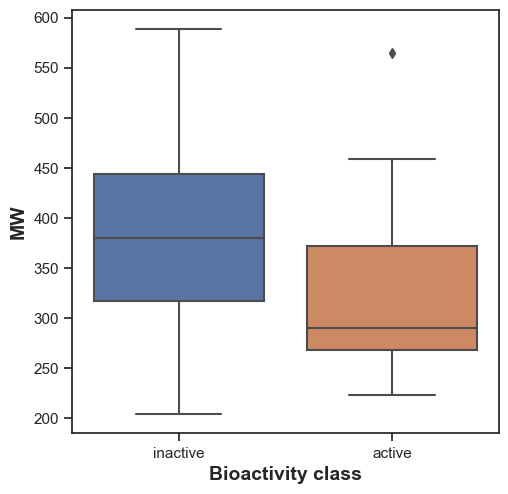

In [164]:
# MW
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [165]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,249.0,0.023567,0.05,Different distribution (reject H0)


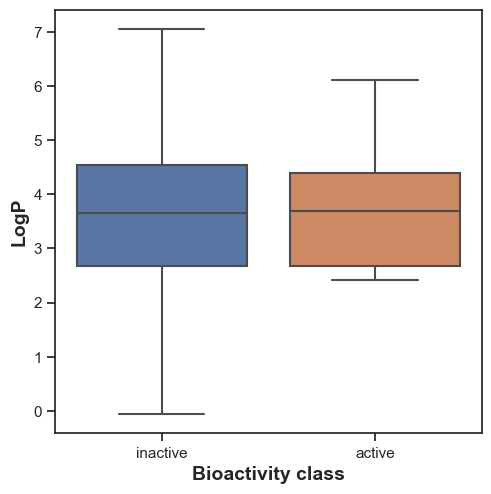

In [167]:
# logp
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [168]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,425.0,0.90798,0.05,Same distribution (fail to reject H0)


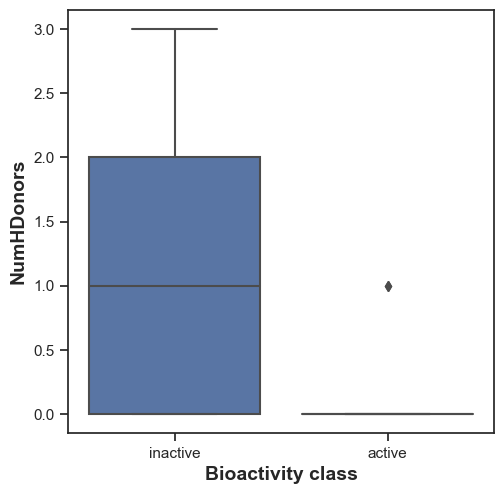

In [170]:
# numHdonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [171]:
mannwhitney('NumHDonors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,178.5,0.00062,0.05,Different distribution (reject H0)


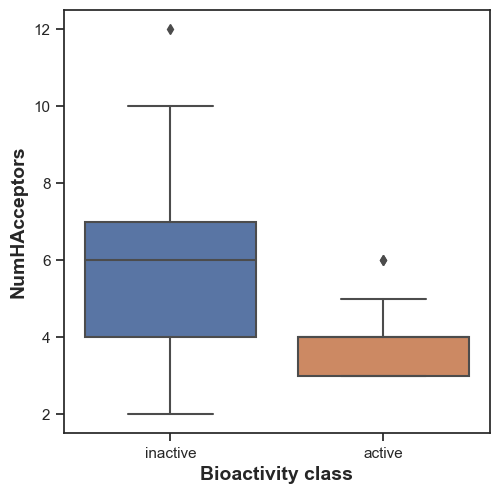

In [173]:
# numhacceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df2_class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [174]:
mannwhitney('NumHAcceptors')


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,248.0,0.020964,0.05,Different distribution (reject H0)
